In [1]:
import pandas as pd
import numpy as np

np.__version__

'1.19.5'

In [2]:
lyrics_df = pd.read_csv('./data/8-OUTPUT-lyric-lines-with-similar-lyric-index.csv')
lyrics_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,similar_lyric_indices
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,"[140563, 140542, 93272, 105020, 60697, 146932,..."
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,"[8608, 53329, 76150, 86708, 137813, 76135, 120..."
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,[]
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,"[42847, 97547, 101722, 119746, 104908, 119764,..."
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,[]
...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,[80996]
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,[]
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,"[15842, 26791, 50160, 73582, 73597]"
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,[]


# For a given song, display the lyrics, cliche score, and related lyrics:

### Get related lyrics for a line

In [3]:
import json

In [4]:
def get_nearest_lyrics(the_lyric_index, song_id):
    the_similar_lyric_indices = json.loads(lyrics_df.similar_lyric_indices[the_lyric_index])
    nearest = lyrics_df.iloc[
            the_similar_lyric_indices
        ]
    nearest_not_in_same_song = nearest[nearest.song_id != song_id]
    return list(
        nearest_not_in_same_song.lyric_line
    )

### Get metadata for a song

In [5]:
def process_row(row):
    lyric = row.lyric_line
    print(lyric)
    nearest = get_nearest_lyrics(row.name, row.song_id)
    if len(nearest):
        print(nearest)
    
    print('')


def print_lyrics_and_cliches_for_song_id(song_id):
    lyrics_for_song = lyrics_df[
        lyrics_df.song_id == song_id
    ]
    lyrics_for_song.apply(process_row, axis=1)

In [10]:
# song_id = 'Drivers LicenseOlivia Rodrigo'
song_id = 'Shape Of YouEd Sheeran'

# song_id = 'Candy Shop50 Cent Featuring Olivia' # WRONG LYRICS 
# song_id = "Get Up And Boogie (That's Right)Silver Convention" # very few lyrics
# song_id = 'Hot Fun In The SummertimeSly & The Family Stone' # WRONG LYRICS
# song_id = "UnforgettableFrench Montana Featuring Swae Lee" # WRONG LYRICS
# song_id = "Baby BoyBeyonce Featuring Sean Paul" # WRONG LYRICS
# song_id = "Best Thing That Ever Happened To MeGladys Knight And The Pips" # WRONG LYRICS
print_lyrics_and_cliches_for_song_id(song_id)

The club isn't the best place to find a lover
["Got everybody in the club wantin' to know now", 'Why you bring the money machine to the club for?', "And any club, if it's poppin', my record gon' play", 'I have got no service in the club, you say, say? (Say)', 'I wanna make love in this club (Hey)', "The club can't even handle me right now", "I don't like when, you know, I'm in a club", "Matter fact, after the club, you know what I'm talkin' 'bout", 'Uh, one time for the club, huh (Yeah-eah)', 'Since I said that I was hitting in the club', 'Up in the club (club), just broke up (up)', 'Got my shirt off, the club too packed', "You in the club just to party, I'm there, I get paid a fee", 'Club shut down: a hundred super models']

So the bar is where I go
['That’s a bar, but he ain’t catch it', "But couldn't find an open bar"]

Me and my friends at the table doing shots

Drinking fast and then we talk slow

And you come over and start up a conversation with just me

And trust me I'll give i

In [9]:
# utility: helps you find a song id quickly, to use above
list(lyrics_df[
        lyrics_df.song_id.str.contains('Shape of you', case=False)
    ].song_id)

['Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran',
 'Shape Of YouEd Sheeran']

# Split similar lyrics by "came_before" and "came_after"

In [11]:
lyrics_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,similar_lyric_indices
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,"[140563, 140542, 93272, 105020, 60697, 146932,..."
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,"[8608, 53329, 76150, 86708, 137813, 76135, 120..."
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,[]
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,"[42847, 97547, 101722, 119746, 104908, 119764,..."
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,[]
...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,[80996]
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,[]
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,"[15842, 26791, 50160, 73582, 73597]"
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,[]


## Split 1 line into before & after

In [37]:
def get_nearest_lyrics_split_into_before_and_after(the_lyric_index, song_id):
    the_similar_lyric_indices = json.loads(lyrics_df.similar_lyric_indices[the_lyric_index])
    nearest = lyrics_df.iloc[
            the_similar_lyric_indices
        ]
    nearest_not_in_same_song = nearest[nearest.song_id != song_id]
    # DEFINITION: songs release within 1 year (or earlier) of song count as "before". 
    GRACE_PERIOD = 1 # years
    # Before
    came_before = nearest_not_in_same_song[
        nearest_not_in_same_song.chart_debut_date_as_a_decimal <= GRACE_PERIOD + lyrics_df.chart_debut_date_as_a_decimal[the_lyric_index]
    ]
    came_after = nearest_not_in_same_song[
        nearest_not_in_same_song.chart_debut_date_as_a_decimal > GRACE_PERIOD + lyrics_df.chart_debut_date_as_a_decimal[the_lyric_index]
    ]
    return (
        list(came_before.index),
        list(came_after.index)
    )


get_nearest_lyrics_split_into_before_and_after(the_lyric_index=167357, song_id='pride.is.the.devilJ. Cole & Lil Baby')

get_nearest_lyrics_split_into_before_and_after(the_lyric_index=0, song_id='#9 DreamJohn Lennon')



([140563, 140542, 93272, 60697, 116259, 166198, 126475, 8004, 142260],
 [105020, 146932, 79484, 73894, 103160])

### For each row, generate the before & after, and then store it. Then delete the now redundant total list

#### Compute 'em ⚠️ TAKES ~3 MINUTES ⚠️ 

In [44]:
before_and_after_for_each_row = lyrics_df.apply(
    lambda row: get_nearest_lyrics_split_into_before_and_after(row.name, row.song_id),
    axis=1
)

just_before = [row[0] for row in before_and_after_for_each_row]

just_after = [row[1] for row in before_and_after_for_each_row]


#### Inject into dataset

In [56]:
with_before_and_after_df = lyrics_df.copy().drop(columns='similar_lyric_indices')
with_before_and_after_df['similar_lyric_that_came_before_indices'] = just_before
with_before_and_after_df['similar_lyric_that_came_after_indices'] = just_after
with_before_and_after_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,similar_lyric_that_came_before_indices,similar_lyric_that_came_after_indices
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,"[140563, 140542, 93272, 60697, 116259, 166198,...","[105020, 146932, 79484, 73894, 103160]"
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,"[127890, 139008, 75764, 143437]","[8608, 53329, 76150, 86708, 137813, 76135, 120..."
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,[],[]
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,[],"[42847, 97547, 101722, 119746, 104908, 119764,..."
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,[],[]
...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,[80996],[]
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,[],[]
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,"[15842, 26791, 50160, 73582, 73597]",[]
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,[],[]


In [57]:
with_before_and_after_df['num_before'] = with_before_and_after_df.similar_lyric_that_came_before_indices.apply(lambda arr: len(arr))
with_before_and_after_df['num_after'] = with_before_and_after_df.similar_lyric_that_came_after_indices.apply(lambda arr: len(arr))
with_before_and_after_df


,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,similar_lyric_that_came_before_indices,similar_lyric_that_came_after_indices,num_before,num_after
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,"[140563, 140542, 93272, 60697, 116259, 166198,...","[105020, 146932, 79484, 73894, 103160]",9,5
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,"[127890, 139008, 75764, 143437]","[8608, 53329, 76150, 86708, 137813, 76135, 120...",4,10
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,[],[],0,0
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,[],"[42847, 97547, 101722, 119746, 104908, 119764,...",0,14
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,[],[],0,0
...,...,...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,[80996],[],1,0
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,[],[],0,0
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,"[15842, 26791, 50160, 73582, 73597]",[],5,0
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,[],[],0,0


In [58]:
with_before_and_after_df.groupby('song_id').agg('mean').sort_values(by='num_before')

,chart_debut_date_as_a_decimal,num_before,num_after
song_id,,,
"Hello, Dolly!Louis Armstrong And The All Stars",1964.13,0.000000,1.500000
We Can Work It OutThe Beatles,1965.96,0.000000,2.000000
Cradle Of LoveJohnny Preston,1960.23,0.000000,3.210526
Crying TimeRay Charles,1965.94,0.000000,0.764706
Danny BoyConway Twitty,1959.73,0.000000,2.181818
...,...,...,...
Me Porto BonitoBad Bunny & Chencho Corleone,2022.39,9.720930,0.000000
UnforgettableFrench Montana Featuring Swae Lee,2017.33,9.816327,0.040816
YonaguniBad Bunny,2021.46,10.200000,0.000000


In [60]:
agged = with_before_and_after_df.groupby('song_id').agg('mean').sort_values(by='num_after')
agged

,chart_debut_date_as_a_decimal,num_before,num_after
song_id,,,
Major DistributionDrake & 21 Savage,2022.88,3.295455,0.000000
Kill BillSZA,2022.98,0.766667,0.000000
KarmaTaylor Swift,2022.84,2.804878,0.000000
Silent HillKendrick Lamar & Kodak Black,2022.40,2.254545,0.000000
Jimmy CooksDrake Featuring 21 Savage,2022.50,1.237288,0.000000
...,...,...,...
Goodbye BabyJack Scott,1958.95,0.105263,10.000000
ApacheJorgen Ingmann & His Guitar,1961.06,0.083333,10.472222
JavaAl (He's the King) Hirt,1964.01,1.263158,10.526316


#### Relationship between similar lyrics that came *before vs after* the songs.

<AxesSubplot:xlabel='num_before', ylabel='num_after'>

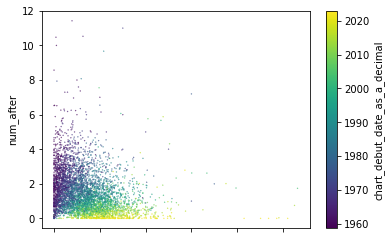

In [73]:
agged.plot.scatter(x='num_before', y='num_after', s=0.1, c='chart_debut_date_as_a_decimal', colormap='viridis')

#### Influential songs:

<AxesSubplot:xlabel='chart_debut_date_as_a_decimal', ylabel='num_after'>

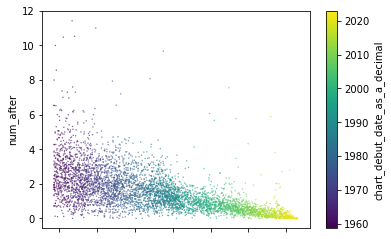

In [76]:
agged.plot.scatter(x='chart_debut_date_as_a_decimal', y='num_after', s=0.1, c='chart_debut_date_as_a_decimal', colormap='viridis')


#### "Cliche" songs

<AxesSubplot:xlabel='chart_debut_date_as_a_decimal', ylabel='num_before'>

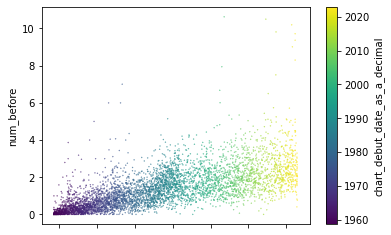

In [77]:
agged.plot.scatter(x='chart_debut_date_as_a_decimal', y='num_before', s=0.1, c='chart_debut_date_as_a_decimal', colormap='viridis')


<AxesSubplot:>

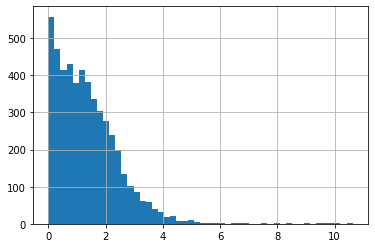

In [69]:
agged.num_before.hist(bins=50)

<AxesSubplot:>

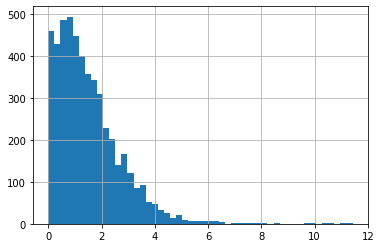

In [70]:
agged.num_after.hist(bins=50)

# Export

In [50]:
with_before_and_after_df[['song_id', 'lyric_line', 'similar_lyric_that_came_before_indices', 'similar_lyric_that_came_after_indices']].to_csv('./data/9-OUTPUT-with-similar-lyric-lines-split-into-before-and-after.csv')

